In [111]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [112]:
#Loading data
data = pd.read_csv("/home/aims/Documents/Kaggle Data/diabetes.csv")

#Input values of features
X = data.drop('BMI',1).values
print('shape of X: ',X.shape)

#Output values of features
y = data['BMI'].values.reshape(-1,1)
print('shape of y: ',y.shape)

#splitting data into train and test set
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)


shape of X:  (768, 8)
shape of y:  (768, 1)


In [113]:
#Define cost fuction
#X-input values matrix, y-output value vector, parameter vector

def cost_function(X,y,params):
    #number of samples
    no_samples = len(y)
    
    #Error- difference between predicted value of y and actual/observed value of value
    error = (X@params) - y
    
    #formula for obtaining the cost
    return (1/(2*no_samples))*np.sum(error**2)
    
    

In [114]:
#Define gradient descent
def gradient_descent(X, y, params, learning_rate, n_iters):
    no_samples = len(y)
    
    #Track cost in each iteration
    cost_track = np.zeros((n_iters,1))
    
    for i in range(n_iters):
        #updating parameters
        params = params - (learning_rate/no_samples)* X.T @ (X@params-y)
        cost_track[i] = cost_function(X,y,params)
    return (cost_track,params)

In [115]:
#Normalizing our data/ feature scaling 
mu = np.mean(x_train,0)
sigma = np.std(x_train,0)

x_train = (x_train-mu)/sigma

#Introducing bias in our input matrix
x_train = np.hstack((np.ones((x_train.shape[0],1)),x_train))

#Initialising parameters to zeros
params = np.zeros((x_train.shape[1],1))

Initial cost is :  549.9019136807818
Optimal parameters are:  [[32.20667752]
 [-0.20253948]
 [ 0.88835153]
 [ 1.41410899]
 [ 2.71927362]
 [-0.34896191]
 [ 0.20942998]
 [-0.42277112]
 [ 1.82124106]]
Final cost is:  [22.57762383]


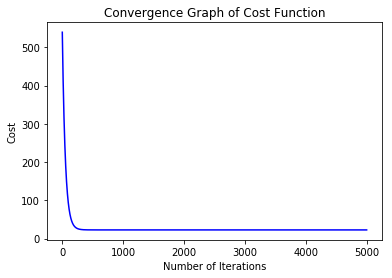

In [116]:
#Training our model
n_iters  = 5000

learning_rate = 0.01

initial_cost = cost_function(x_train,y_train,params)

print('Initial cost is : ', initial_cost)

(cost_track, optimal_parameters) = gradient_descent(x_train,y_train,params,learning_rate,n_iters)

print('Optimal parameters are: ', optimal_parameters)

print('Final cost is: ', cost_track[-1])

#Plotting a graph of convergence of cost fuction

plt.plot(range(len(cost_track)), cost_track, 'b')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [117]:
#Normalising our test set
x_test = (x_test-mu)/sigma

#Introducing bias to test set
x_test = np.hstack((np.ones((x_test.shape[0],1)),x_test))

#predicting the y output
y_pred = x_test@optimal_parameters


In [118]:
#Evaluating our model using RMSE
rms = np.sqrt(mean_squared_error(y_pred, y_test))
rms

6.861001413749793